# Simulating and analyzing complex social systems

## Lab 3. Flow

a. Macroscopic traffic flow (fundamental diagram)

b. Microscopic traffic flow (car following model: SUMO, traffic simulation)

c. Pedestrian flow models (social force model)


## A. Macroscopic traffic flow


Observe data on fundamental properties from one of the empirical dataset records and plot the relations between:

* flow
* speed
* density


Use data from http://github.com/ThomasAFink/mfd_traffic_congestion_for_data_scientists

and plot at least one meaningful diagram


In [1]:
import pandas as pd
import os
import seaborn as sns

In [12]:
url = "http://github.com/ThomasAFink/mfd_traffic_congestion_for_data_scientists/blob/main/data/eth_bolton_sensor_data_utd19.csv"
url = "https://raw.githubusercontent.com/ThomasAFink/mfd_traffic_congestion_for_data_scientists/main/data/eth_bolton_sensor_data_utd19.csv"
df = pd.read_csv(url)
df = df[df['FLOW'].notna()]
df = df[df['SPEED'].notna()]
df = df[df['DENSITY'].notna()]

df =  df.loc[(df!=0).any(axis=1)]

df = df[df.SPEED<200]

In [13]:
df.sample(10)

,DATE,INTERVAL,ID,FLOW,DENSITY,ERROR,CITY,SPEED
142728,2017-11-17,37500,N53261U,444,13875.000000,NaN,bolton,32.0
181296,2017-11-18,13800,N51242J,684,27.360000,1.0,bolton,25.0
84321,2017-11-13,56700,N53391J,1116,39.857143,1.0,bolton,28.0
184457,2017-11-18,18900,N51321P,648,18.514286,1.0,bolton,35.0
65930,2017-11-15,84000,N51321S,1440,72.000000,1.0,bolton,20.0
236280,2017-11-14,46800,N52151Y,456,10.604651,1.0,bolton,43.0
210049,2017-11-14,3900,N52171O,0,0.000000,1.0,bolton,0.0
161368,2017-11-17,67800,N51232K,540,19.285714,1.0,bolton,28.0
51811,2017-11-15,61200,N51241D,552,18.400000,1.0,bolton,30.0
128166,2017-11-17,14100,N51231O,408,11.657143,1.0,bolton,35.0


In [5]:
locations = pd.Series(df.ID.unique())
locations

0      N51141G
1      N51151A
2      N51151B
3      N51151D
4      N51161W
        ...   
155    N53391Q
156    N53391N
157    N52151B
158    N52151A
159    N53411L
Length: 160, dtype: object

In [6]:
location = locations.sample(1).to_list()[0]
location = "N53312U"

In [7]:
to_plot =  df[df.ID == location]
to_plot.shape

(1481, 8)

In [8]:
to_plot

,DATE,INTERVAL,ID,FLOW,DENSITY,ERROR,CITY,SPEED
155,2017-11-13,30900,N53312U,288,8.228571,1.0,bolton,35.000000
321,2017-11-13,31200,N53312U,564,20.142857,1.0,bolton,28.000000
487,2017-11-13,32100,N53312U,696,23.200000,1.0,bolton,30.000000
653,2017-11-13,42900,N53312U,300,9.090909,1.0,bolton,33.000000
819,2017-11-14,64500,N53312U,546,25.140000,NaN,bolton,21.718377
...,...,...,...,...,...,...,...,...
246167,2017-11-14,63000,N53312U,504,18.666667,NaN,bolton,27.000000
246333,2017-11-14,63300,N53312U,480,24.000000,NaN,bolton,20.000000
246499,2017-11-14,63600,N53312U,708,25.285714,NaN,bolton,28.000000
246665,2017-11-14,63900,N53312U,492,20.545455,NaN,bolton,23.946903


In [9]:
to_plot.SPEED.sort_values().tail()

217117    80.0
217283    80.0
217449    80.0
18581     80.0
211141    80.0
Name: SPEED, dtype: float64

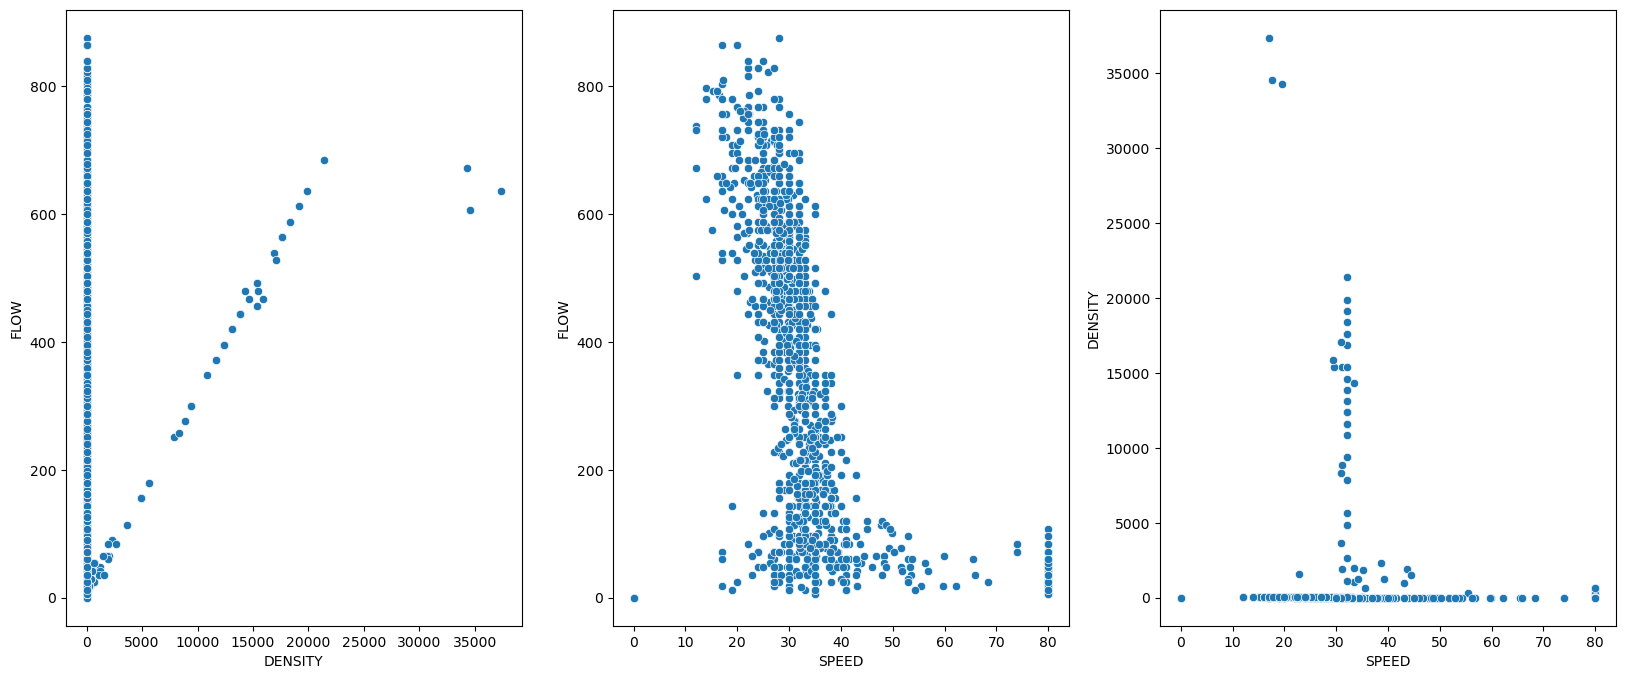

In [10]:
import itertools
import matplotlib.pyplot as plt
cols = ['FLOW',"DENSITY", "SPEED"]
combs = list(itertools.combinations(cols,2))
fig, axes = plt.subplots(1,len(combs), figsize = (20,8))
i = 0
for comb in combs:
    sns.scatterplot(data = to_plot, x = comb[1],y = comb[0], ax = axes[i])
    i+=1

----

## B. Microscopic traffic flow


Go to the webiste: https://traffic-simulation.de/ and experiment with various settings.

Excercise:
1. Choose one  of available layouts
2. First try to create congestion - traffic jam
3. Observe the main parameters of the flow at the capacity
4. Try to reach the maximal flow
5. Either via demand management (control the inflow)
6. Either via supply management (traffic lights, more lanes, etc.)


# C: Social force model for pedestrians

* use [this](https://github.com/svenkreiss/socialforce) repository 
* follow this [corridor example](https://github.com/svenkreiss/socialforce/blob/main/guide/corridor.ipynb)
* change number of people to very low
* change the number of people to very high
*  make the corridor narrow
* observe 10 seconds of movement



# extras: SUMO

https://sumo.dlr.de/docs/Tutorials/Hello_World.html